## Getting Started

Let's load the data set, have a look and do the Exploratory Data Analysis (EDA).

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

sns.set()

/var/folders/n0/hqdh14fj5dl_lmjnfszy48y00000gn/T/ipykernel_2003/3893563994.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# color palette for this notboot
pal = sns.color_palette('crest')
pal.as_hex()

['#7dba91', '#59a590', '#40908e', '#287a8c', '#1c6488', '#254b7f']

In [3]:
hex_codes = pal.as_hex()
print(hex_codes)

['#7dba91', '#59a590', '#40908e', '#287a8c', '#1c6488', '#254b7f']


In [4]:
plt.rcParams['font.family'] = 'serif'

In [5]:
# load the data
data = pd.read_csv('data/train.csv')

In [6]:
# size of the data set
data.shape

(1677, 35)

In [7]:
# first look
data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [8]:
# have a look at the columns/features
data.columns

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [9]:
# find out how many values are missing per column
missing = pd.DataFrame(data.isnull().sum(), columns=["Amount"])
missing['Percentage'] = round((missing['Amount']/data.shape[0])*100, 2)
missing

,Amount,Percentage
id,0,0.0
Age,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EnvironmentSatisfaction,0,0.0


Oh wow, no missing values! That's fantastic!

In [10]:
# check how many distinct values we have per column
data.nunique()

id                          1677
Age                           43
BusinessTravel                 3
DailyRate                    625
Department                     3
DistanceFromHome              29
Education                      6
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       6
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                895
MonthlyRate                  903
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             41
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

In [11]:
# check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

I'm still not sure what each column means. Hopefully I'll find out in the course of the EDA. Then we'll also see what possible values there are in each case.

## EDA

First I want to check the distribution of the later target variable: Attrition. There was no further explanation on Kaggle regarding this variable, but I assume that 1 means yes, 0 means no while yes means that the fact of attrition applies which ultimately means that the employee will leave the company. I will therefore also write "the employee leaves the company" in the explanations in this notebook if the target variable is 1.

### Attrition

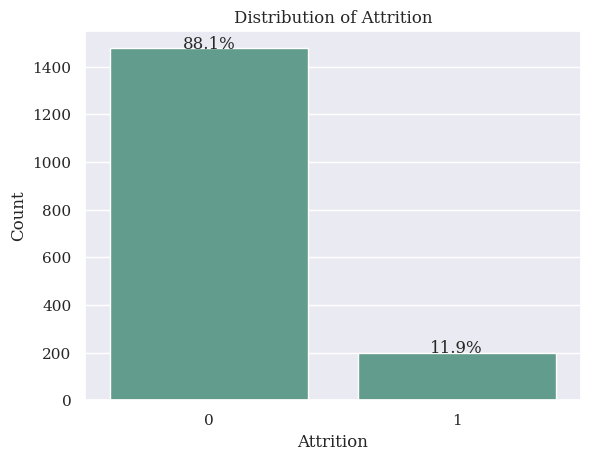

In [12]:
ax = sns.countplot(x='Attrition', data=data, color='#59a590')

total_count = len(data['Attrition'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.02, 
            f'{height/total_count:.1%}',
            ha='center')
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')

plt.show()

Only 11,9 % of the employees will leave the company (soon).

Now let's go through all features in the data set and visualize them.

We start with the

### Age

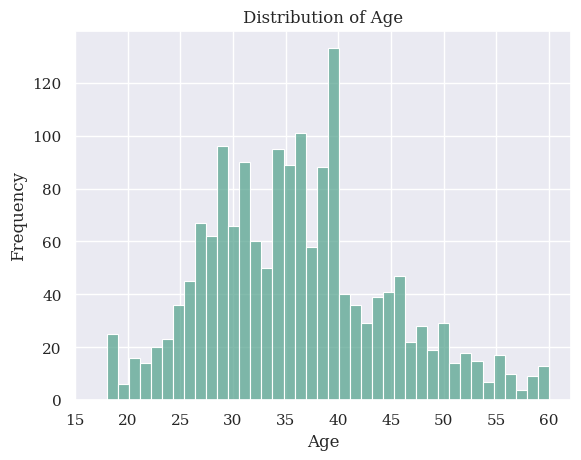

In [13]:
sns.histplot(data['Age'], bins=int(math.sqrt(len(data['Age']))), kde=False, color='#59a590', edgecolor='white')

x_ticks = np.arange(15, 65, 5).tolist()
plt.xticks(x_ticks)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

### BusinessTravel

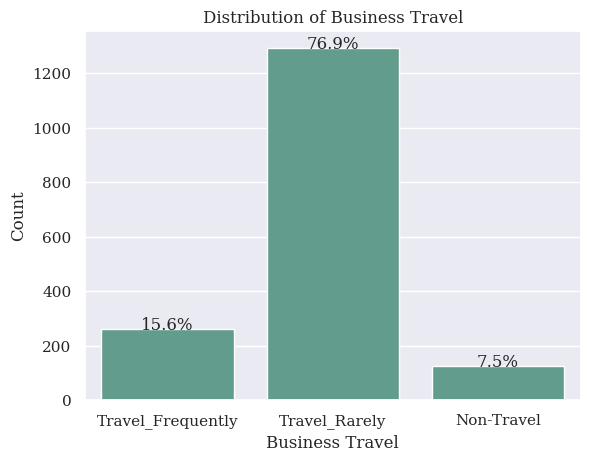

In [14]:
ax = sns.countplot(x='BusinessTravel', data=data, color='#59a590')

total_count = len(data['BusinessTravel'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.02, 
            f'{height/total_count:.1%}',
            ha='center')
plt.title('Distribution of Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')

plt.show()

### DailyRate

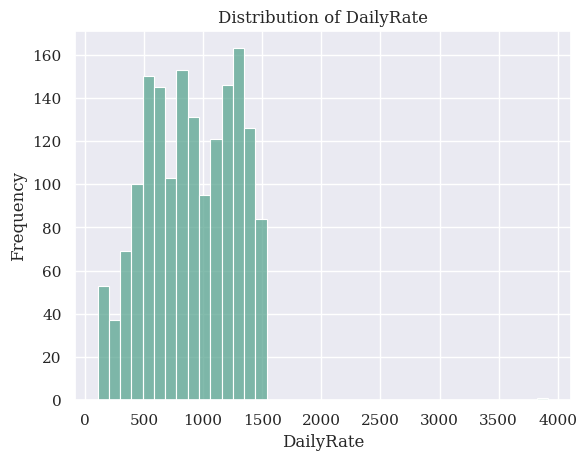

In [15]:
sns.histplot(data['DailyRate'], bins=int(math.sqrt(len(data['DailyRate']))), kde=False, color='#59a590', edgecolor='white')

plt.title('Distribution of DailyRate')
plt.xlabel('DailyRate')
plt.ylabel('Frequency')

plt.show()

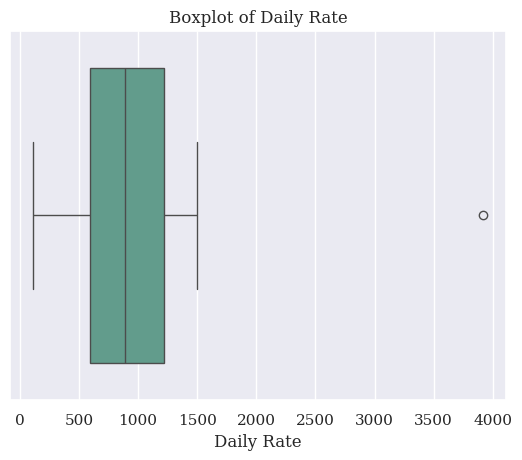

In [16]:
sns.boxplot(x='DailyRate', data=data, color='#59a590')
plt.title('Boxplot of Daily Rate')
plt.xlabel('Daily Rate')
plt.show()

### Department

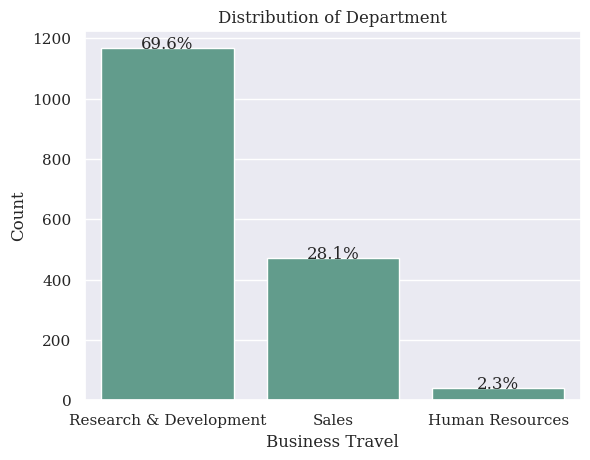

In [17]:
ax = sns.countplot(x='Department', data=data, color='#59a590')

total_count = len(data['Department'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.02, 
            f'{height/total_count:.1%}',
            ha='center')
plt.title('Distribution of Department')
plt.xlabel('Business Travel')
plt.ylabel('Count')

plt.show()

### DistanceFromHome

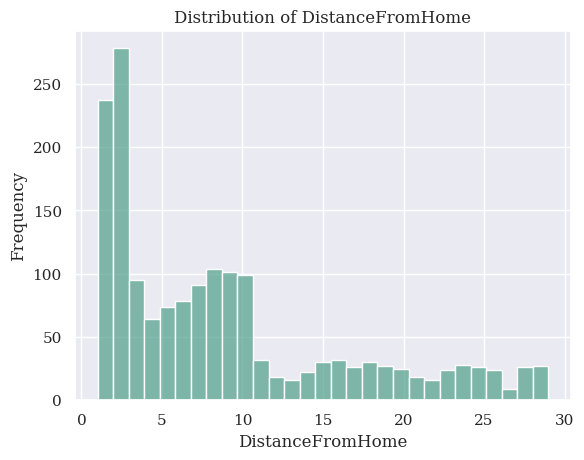

In [18]:
sns.histplot(data['DistanceFromHome'], bins=data['DistanceFromHome'].nunique(), kde=False, color='#59a590', edgecolor='white')

plt.title('Distribution of DistanceFromHome')
plt.xlabel('DistanceFromHome')
plt.ylabel('Frequency')

plt.show()

### Education

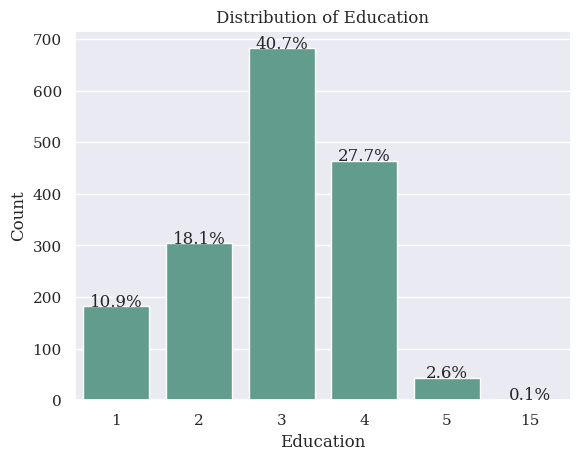

In [19]:
ax = sns.countplot(x='Education', data=data, color='#59a590')

total_count = len(data['Education'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.02, 
            f'{height/total_count:.1%}',
            ha='center')
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')

plt.show()

What does these numbers mean? Maybe something like:
**1** Primary, 
**2** High School,
**3** Bachelor's,
**4** Master's,
**5** PhD ?

We don't know and can't find out. I assume that the higher the number the higher the education level.
15 is an obvious outlier and seemingly wrong.

### EducationField

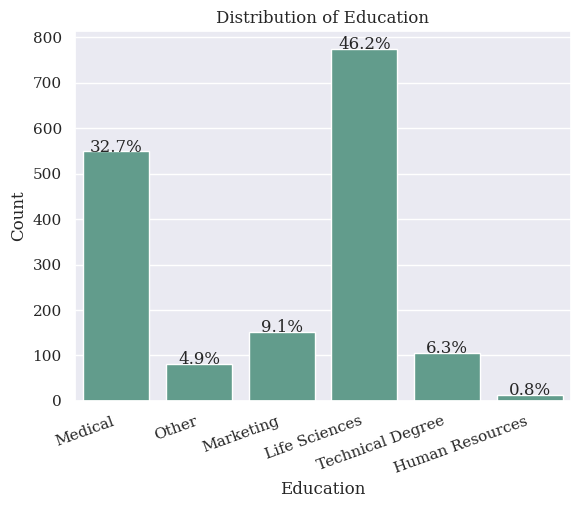

In [20]:
ax = sns.countplot(x='EducationField', data=data, color='#59a590')

total_count = len(data['EducationField'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.02, 
            f'{height/total_count:.1%}',
            ha='center')
plt.xticks(rotation=20, ha='right')
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Count')

plt.show()

### EmployeeCount

In [21]:
data['EmployeeCount'].unique()

array([1])

All oberservations have the same value in this column: 1. So this seems to be a redundant column.

### EnvironmentSatisfaction

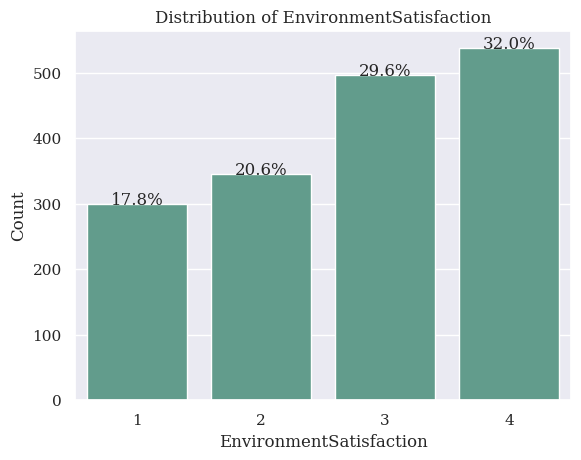

In [22]:
ax = sns.countplot(x='EnvironmentSatisfaction', data=data, color='#59a590')

total_count = len(data['EnvironmentSatisfaction'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.02, 
            f'{height/total_count:.1%}',
            ha='center')
plt.title('Distribution of EnvironmentSatisfaction')
plt.xlabel('EnvironmentSatisfaction')
plt.ylabel('Count')

plt.show()

This appears to be a scale of 1-4 of how satisfied the employee is with their working environment. I guess 4 is most satisfied.

### Gender

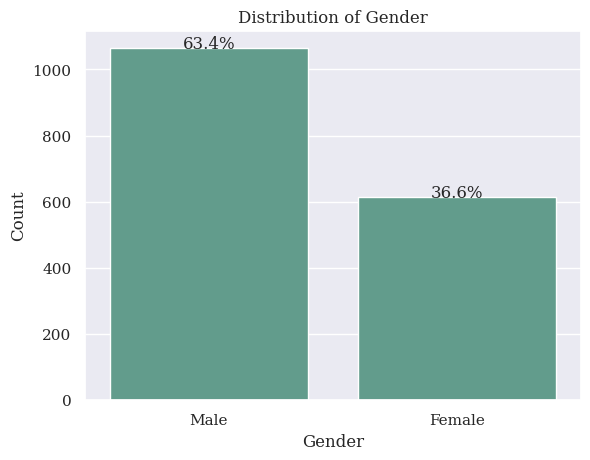

In [23]:
ax = sns.countplot(x='Gender', data=data, color='#59a590')

total_count = len(data['Gender'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.02, 
            f'{height/total_count:.1%}',
            ha='center')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

### HourlyRate

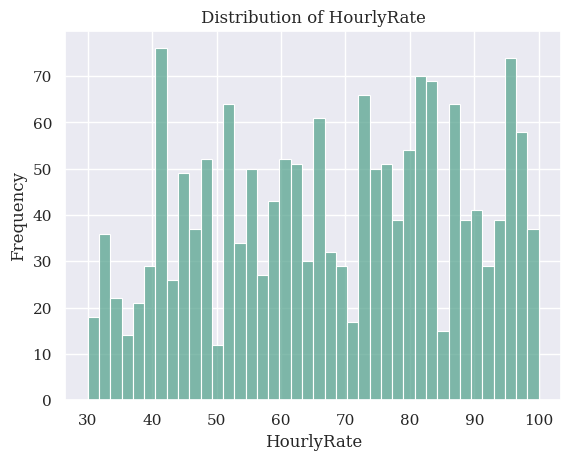

In [24]:
sns.histplot(data['HourlyRate'], bins=int(math.sqrt(len(data['HourlyRate']))), kde=False, color='#59a590', edgecolor='white')

plt.title('Distribution of HourlyRate')
plt.xlabel('HourlyRate')
plt.ylabel('Frequency')

plt.show()

### JobInvolvement

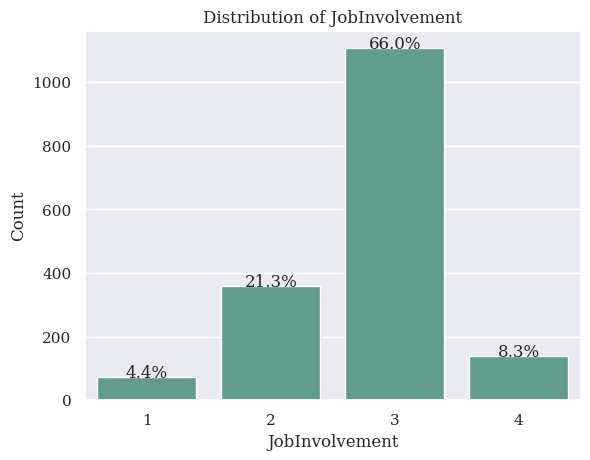

In [25]:
ax = sns.countplot(x='JobInvolvement', data=data, color='#59a590')

total_count = len(data['JobInvolvement'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.02, 
            f'{height/total_count:.1%}',
            ha='center')
plt.title('Distribution of JobInvolvement')
plt.xlabel('JobInvolvement')
plt.ylabel('Count')

plt.show()

Job involvement is the degree to which an employee identifies with their work, actively participates in it, and derives a sense of self-worth from it. 

### JobLevel

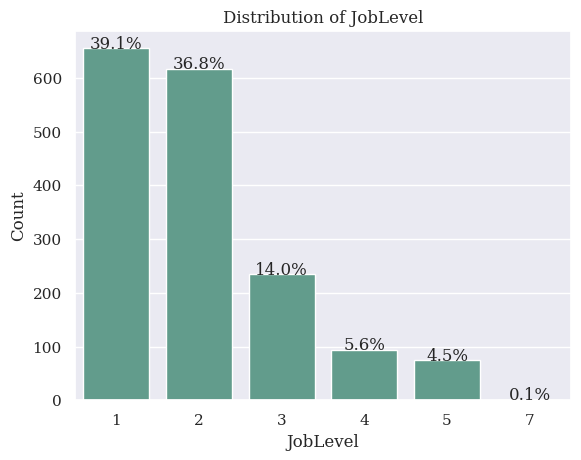

In [26]:
ax = sns.countplot(x='JobLevel', data=data, color='#59a590')

total_count = len(data['JobLevel'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.02, 
            f'{height/total_count:.1%}',
            ha='center')
plt.title('Distribution of JobLevel')
plt.xlabel('JobLevel')
plt.ylabel('Count')

plt.show()

### JobRole

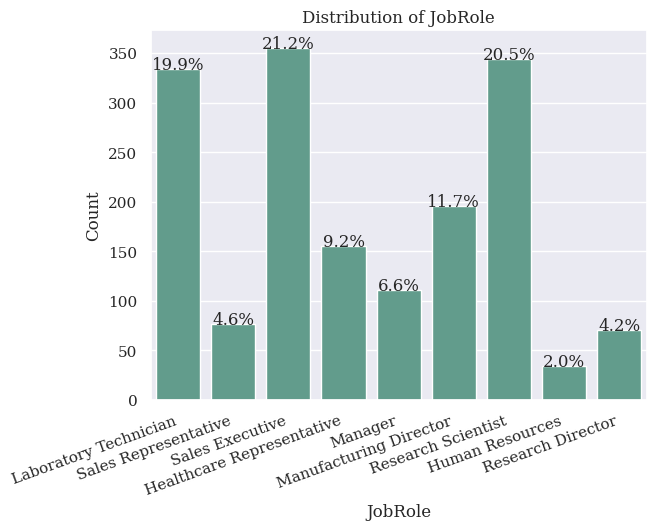

In [27]:
ax = sns.countplot(x='JobRole', data=data, color='#59a590')

total_count = len(data['JobRole'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.02, 
            f'{height/total_count:.1%}',
            ha='center')
plt.xticks(rotation=20, ha='right')
plt.title('Distribution of JobRole')
plt.xlabel('JobRole')
plt.ylabel('Count')

plt.show()

In [28]:
jobrole_levels = data.groupby('JobRole')['JobLevel'].unique()
for jobrole, levels in jobrole_levels.items():
    print(f"{jobrole}: {levels}")
    print()

Healthcare Representative: [2 3 4 1]

Human Resources: [2 1 3]

Laboratory Technician: [1 2 3]

Manager: [5 4 3 1 2]

Manufacturing Director: [2 3 4 7]

Research Director: [3 5 4 1]

Research Scientist: [1 2 5 3]

Sales Executive: [2 3 4 1]

Sales Representative: [1]



### MaritalStatus

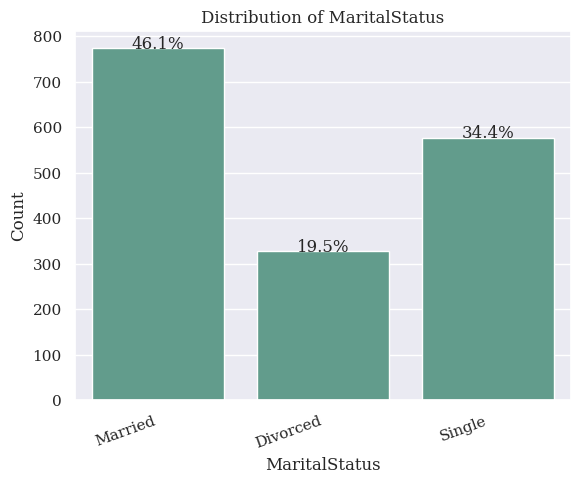

In [29]:
ax = sns.countplot(x='MaritalStatus', data=data, color='#59a590')

total_count = len(data['MaritalStatus'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.02, 
            f'{height/total_count:.1%}',
            ha='center')
plt.xticks(rotation=20, ha='right')
plt.title('Distribution of MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')

plt.show()

## MonthlyIncome

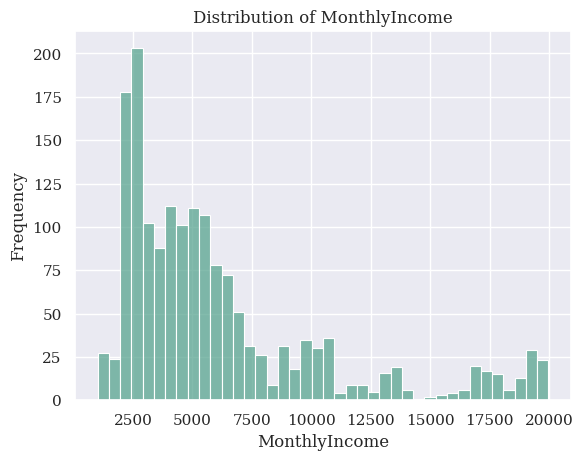

In [30]:
sns.histplot(data['MonthlyIncome'], bins=int(math.sqrt(len(data['MonthlyIncome']))), kde=False, color='#59a590', edgecolor='white')

plt.title('Distribution of MonthlyIncome')
plt.xlabel('MonthlyIncome')
plt.ylabel('Frequency')

plt.show()

### MonthlyRate

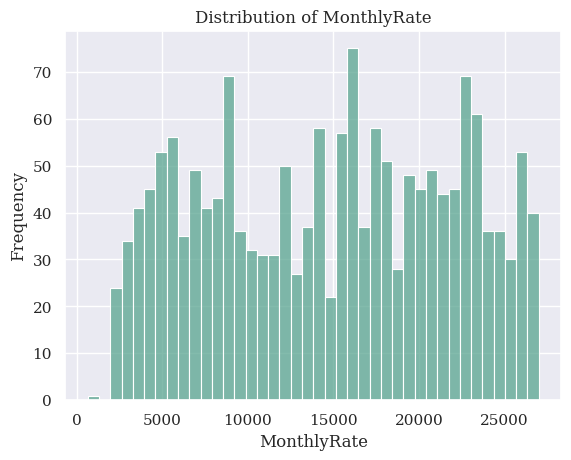

In [31]:
sns.histplot(data['MonthlyRate'], bins=int(math.sqrt(len(data['MonthlyRate']))), kde=False, color='#59a590', edgecolor='white')

plt.title('Distribution of MonthlyRate')
plt.xlabel('MonthlyRate')
plt.ylabel('Frequency')

plt.show()

We have now seen several columns that apparently represent the employee's salary in some form: MonthlyRate, DailyRate, HourlyRate, MonthlyIncome.

I will now try to better understand these features and how they relate to each other.

In [32]:
temp = data[['MonthlyRate', 'DailyRate', 'MonthlyIncome', 'HourlyRate']]

In [33]:
temp

,MonthlyRate,DailyRate,MonthlyIncome,HourlyRate
0,5099,599,2596,42
1,10778,921,2899,46
2,16495,718,4627,80
3,13384,1488,5347,40
4,19805,1017,19033,37
...,...,...,...,...
1672,14255,945,8722,73
1673,15972,1303,3544,48
1674,15322,1184,2804,36
1675,4051,441,5406,48


I did a bit of math and there doesn't seem to be an obvious connection between the individual columns. For example, MonthlyIncome is sometimes 14%, sometimes 133% of MonthlyRate. Also, MonthlyRate, DailyRate and HourlyRate cannot be calculated from each other. There is also a column 'StandardHours' in the data set - but this does not help us either, because it says 80 for all of them.

Let's plot a correlation heatmap to see clearer.

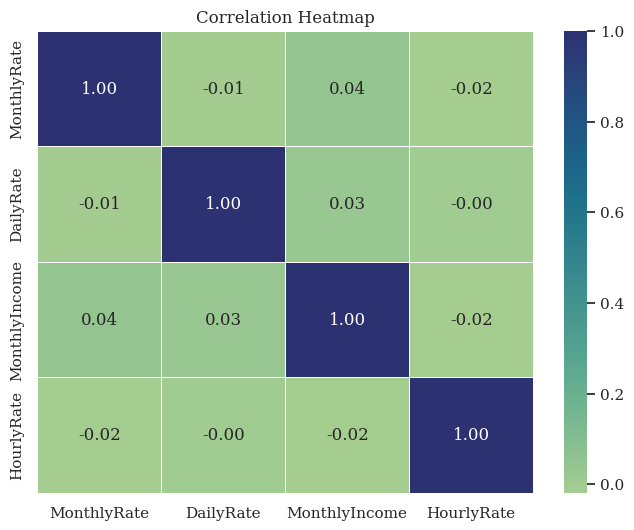

In [34]:
correlation_matrix_salary = temp.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_salary, annot=True, cmap='crest', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

The correlation coefficients between the features are so small that it must be assumed that there is no correlation between the features.

Let me also plot MonthlyRate against MonthlyIncome as a scatter plot.

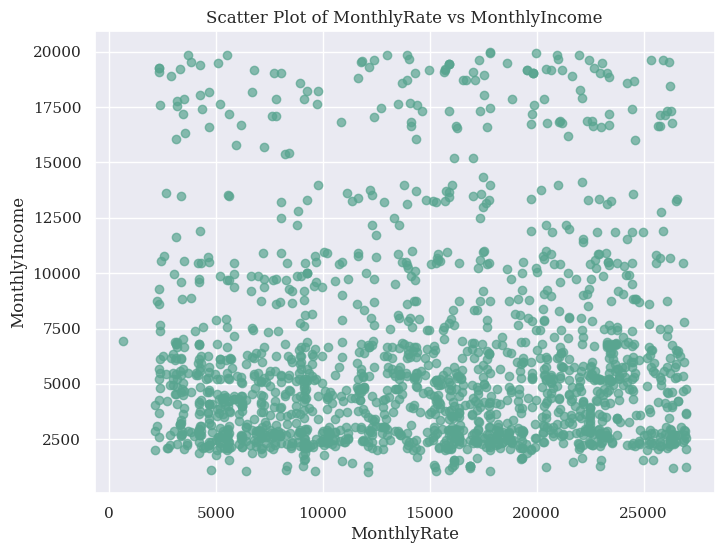

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(temp['MonthlyRate'], temp['MonthlyIncome'], color='#59a590', alpha=0.7)
plt.title('Scatter Plot of MonthlyRate vs MonthlyIncome')
plt.xlabel('MonthlyRate')
plt.ylabel('MonthlyIncome')
plt.grid(True)
plt.show()

No pattern is visible here either. I find that all very surprising. I can't possibly determine what an employee's salary is because I don't know which of these features is closest to the truth. We have to see later whether one of the features has a particularly high correlation with other relevant variables (including the target variable).

### NumCompaniesWorked

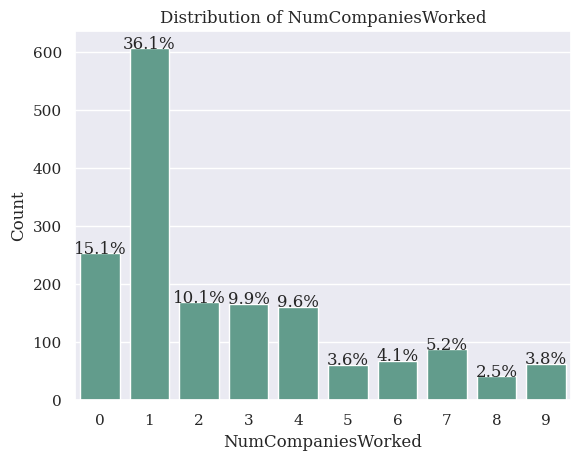

In [36]:
ax = sns.countplot(x='NumCompaniesWorked', data=data, color='#59a590')

total_count = len(data['NumCompaniesWorked'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.02, 
            f'{height/total_count:.1%}',
            ha='center')
plt.title('Distribution of NumCompaniesWorked')
plt.xlabel('NumCompaniesWorked')
plt.ylabel('Count')

plt.show()

As these are all current employees, each of them must have had at least one employer in their lifetime. Thus, the variable seems to indicate how many companies the employee has worked for *before* their current employment.

### Over18

All employees in the data set are over 18, so this variable is useless.

### OverTime

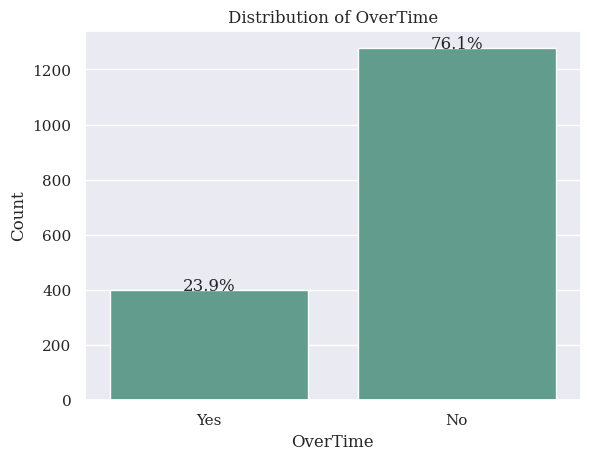

In [37]:
ax = sns.countplot(x='OverTime', data=data, color='#59a590')

total_count = len(data['OverTime'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.02, 
            f'{height/total_count:.1%}',
            ha='center')
plt.title('Distribution of OverTime')
plt.xlabel('OverTime')
plt.ylabel('Count')

plt.show()

### PercentSalaryHike

In [38]:
data['PercentSalaryHike'].unique()

array([13, 17, 14, 11, 12, 15, 21, 16, 18, 19, 24, 22, 23, 20, 25])

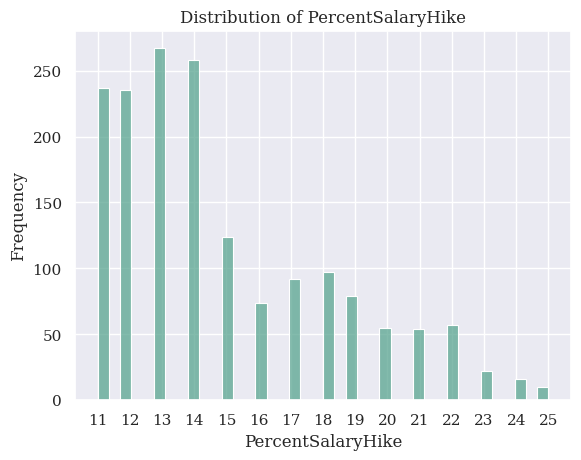

In [39]:
sns.histplot(data['PercentSalaryHike'], bins=int(math.sqrt(len(data['PercentSalaryHike']))), kde=False, color='#59a590', edgecolor='white')

plt.xticks([11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
plt.title('Distribution of PercentSalaryHike')
plt.xlabel('PercentSalaryHike')
plt.ylabel('Frequency')

plt.show()

There are no employees without salaryhike. All of them have received a salary increase of between 11 and 25 % at some point (?).

### PerformanceRating

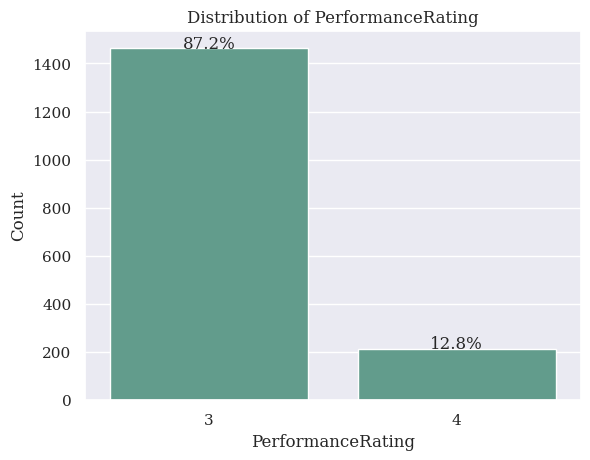

In [40]:
ax = sns.countplot(x='PerformanceRating', data=data, color='#59a590')

total_count = len(data['PerformanceRating'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.02, 
            f'{height/total_count:.1%}',
            ha='center')
plt.title('Distribution of PerformanceRating')
plt.xlabel('PerformanceRating')
plt.ylabel('Count')

plt.show()

For this variable we have only two different values: 3 and 4. I assume 4 is better, but most employees only reach 3.

### RelationshipSatisfaction

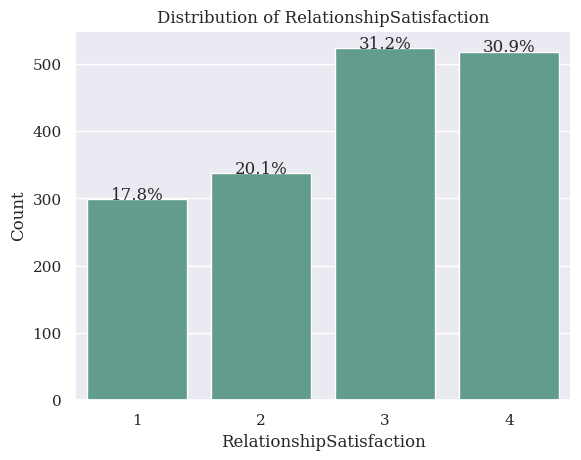

In [41]:
ax = sns.countplot(x='RelationshipSatisfaction', data=data, color='#59a590')

total_count = len(data['RelationshipSatisfaction'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.02, 
            f'{height/total_count:.1%}',
            ha='center')
plt.title('Distribution of RelationshipSatisfaction')
plt.xlabel('RelationshipSatisfaction')
plt.ylabel('Count')

plt.show()

I assume that this refers to satisfaction with relationships at work, i.e. with colleagues, superiors, etc. Most employees seem to be satisfied.

### StandardHours

As mentioned earlier, all employees have value 80 in this column. So it doesn't provide many insights. However, I think 80 hours a week is quite a lot. And very little for one month. Unfortunately, we don't know what period this number refers to.

### StockOptionLevel

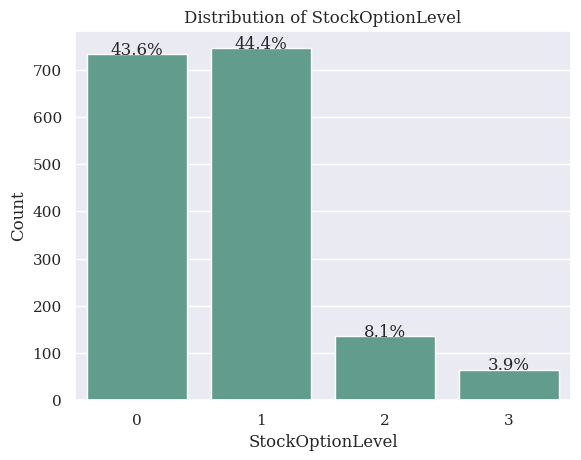

In [42]:
ax = sns.countplot(x='StockOptionLevel', data=data, color='#59a590')

total_count = len(data['StockOptionLevel'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.02, 
            f'{height/total_count:.1%}',
            ha='center')
plt.title('Distribution of StockOptionLevel')
plt.xlabel('StockOptionLevel')
plt.ylabel('Count')

plt.show()

Employee stock options provide the possibility to participate in the share capital of a company. I assume that a higher StockOptionLevel indicates more/better possibilities. 0 could even mean: no possibilities at all. We see that most employees have no or little stock options in their companies.

### TotalWorkingYears

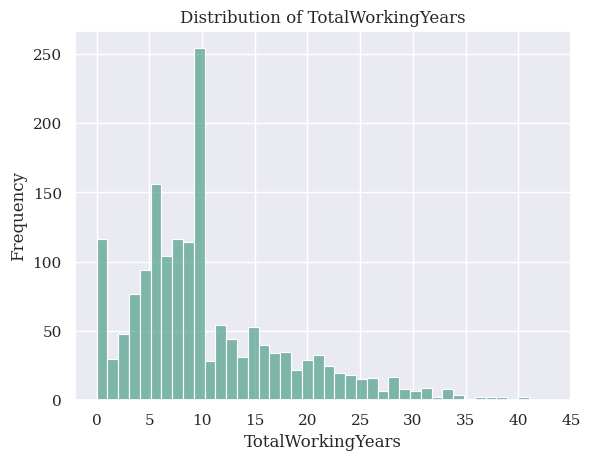

In [43]:
sns.histplot(data['TotalWorkingYears'], bins=int(math.sqrt(len(data['TotalWorkingYears']))), kde=False, color='#59a590', edgecolor='white')

plt.xticks([0,5,10,15,20,25,30,35,40,45])
plt.title('Distribution of TotalWorkingYears')
plt.xlabel('TotalWorkingYears')
plt.ylabel('Frequency')

plt.show()

### TrainingTimesLastYear

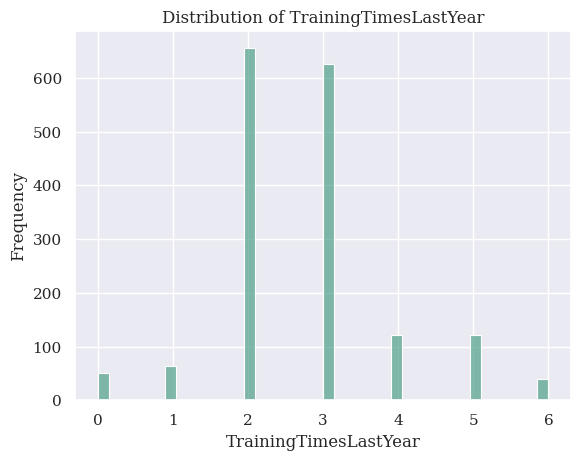

In [44]:
sns.histplot(data['TrainingTimesLastYear'], bins=int(math.sqrt(len(data['TrainingTimesLastYear']))), kde=False, color='#59a590', edgecolor='white')

plt.title('Distribution of TrainingTimesLastYear')
plt.xlabel('TrainingTimesLastYear')
plt.ylabel('Frequency')

plt.show()

Most employees received 2-3 trainings in the last year.

### WorkLifeBalance

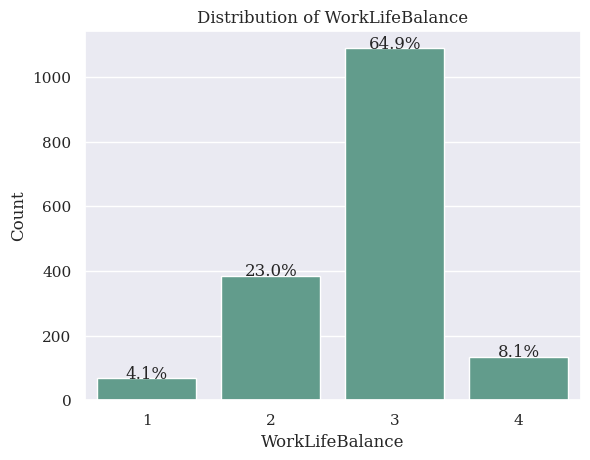

In [45]:
ax = sns.countplot(x='WorkLifeBalance', data=data, color='#59a590')

total_count = len(data['WorkLifeBalance'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.02, 
            f'{height/total_count:.1%}',
            ha='center')
plt.title('Distribution of WorkLifeBalance')
plt.xlabel('WorkLifeBalance')
plt.ylabel('Count')

plt.show()

Another column on subjective job satisfaction. 

### YearsAtCompany

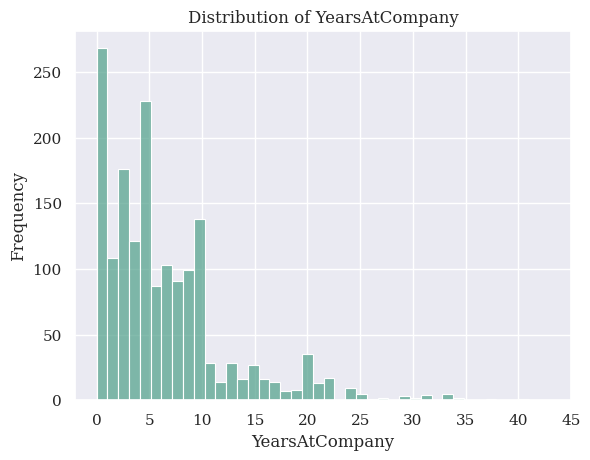

In [46]:
sns.histplot(data['YearsAtCompany'], bins=int(math.sqrt(len(data['YearsAtCompany']))), kde=False, color='#59a590', edgecolor='white')

plt.xticks([0,5,10,15,20,25,30,35,40,45])
plt.title('Distribution of YearsAtCompany')
plt.xlabel('YearsAtCompany')
plt.ylabel('Frequency')

plt.show()

### YearsInCurrentRole

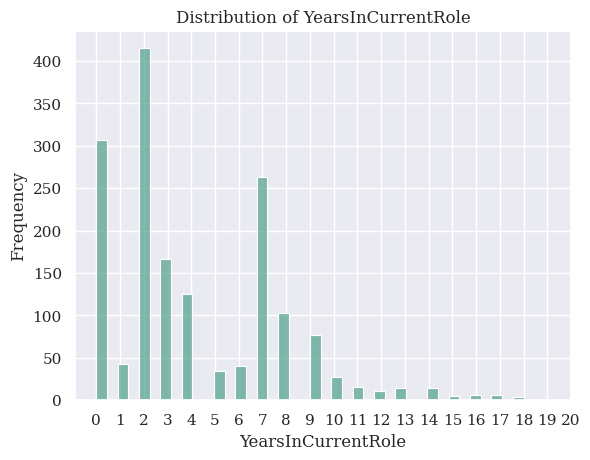

In [47]:
sns.histplot(data['YearsInCurrentRole'], bins=int(math.sqrt(len(data['YearsInCurrentRole']))), kde=False, color='#59a590', edgecolor='white')

plt.xticks(np.arange(21))
plt.title('Distribution of YearsInCurrentRole')
plt.xlabel('YearsInCurrentRole')
plt.ylabel('Frequency')

plt.show()

### YearsSinceLastPromotion

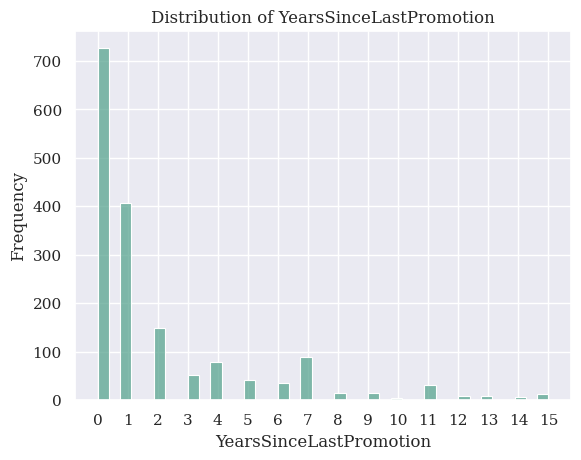

In [48]:
sns.histplot(data['YearsSinceLastPromotion'], bins=int(math.sqrt(len(data['YearsSinceLastPromotion']))), kde=False, color='#59a590', edgecolor='white')

plt.xticks(np.arange(16))
plt.title('Distribution of YearsSinceLastPromotion')
plt.xlabel('YearsSinceLastPromotion')
plt.ylabel('Frequency')

plt.show()

I'm not quite sure how to interpret the 0 here: Under 1 year has passed since the last promotion? Is starting a new job also considered a promotion? Or does 0 mean that there has been no promotion so far? Because surely there must be employees without a promotion?

### YearsWithCurrManager

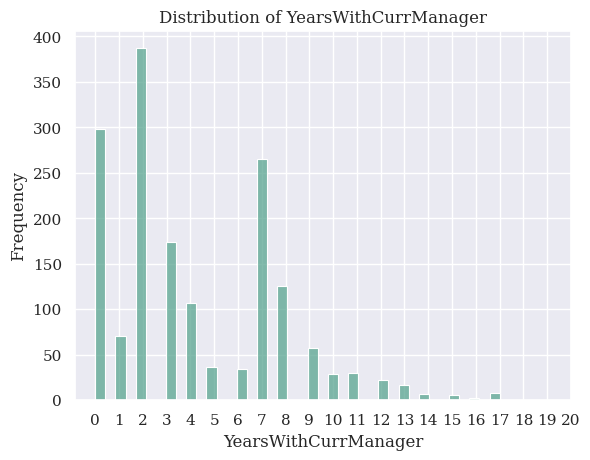

In [49]:
sns.histplot(data['YearsWithCurrManager'], bins=int(math.sqrt(len(data['YearsWithCurrManager']))), kde=False, color='#59a590', edgecolor='white')

plt.xticks(np.arange(21))
plt.title('Distribution of YearsWithCurrManager')
plt.xlabel('YearsWithCurrManager')
plt.ylabel('Frequency')

plt.show()

It will now be interesting to look at the relationships between the variables. Because I am sure there are some correlations in this data set. So let's start with a 

### Correlation heatmap of all numeric features

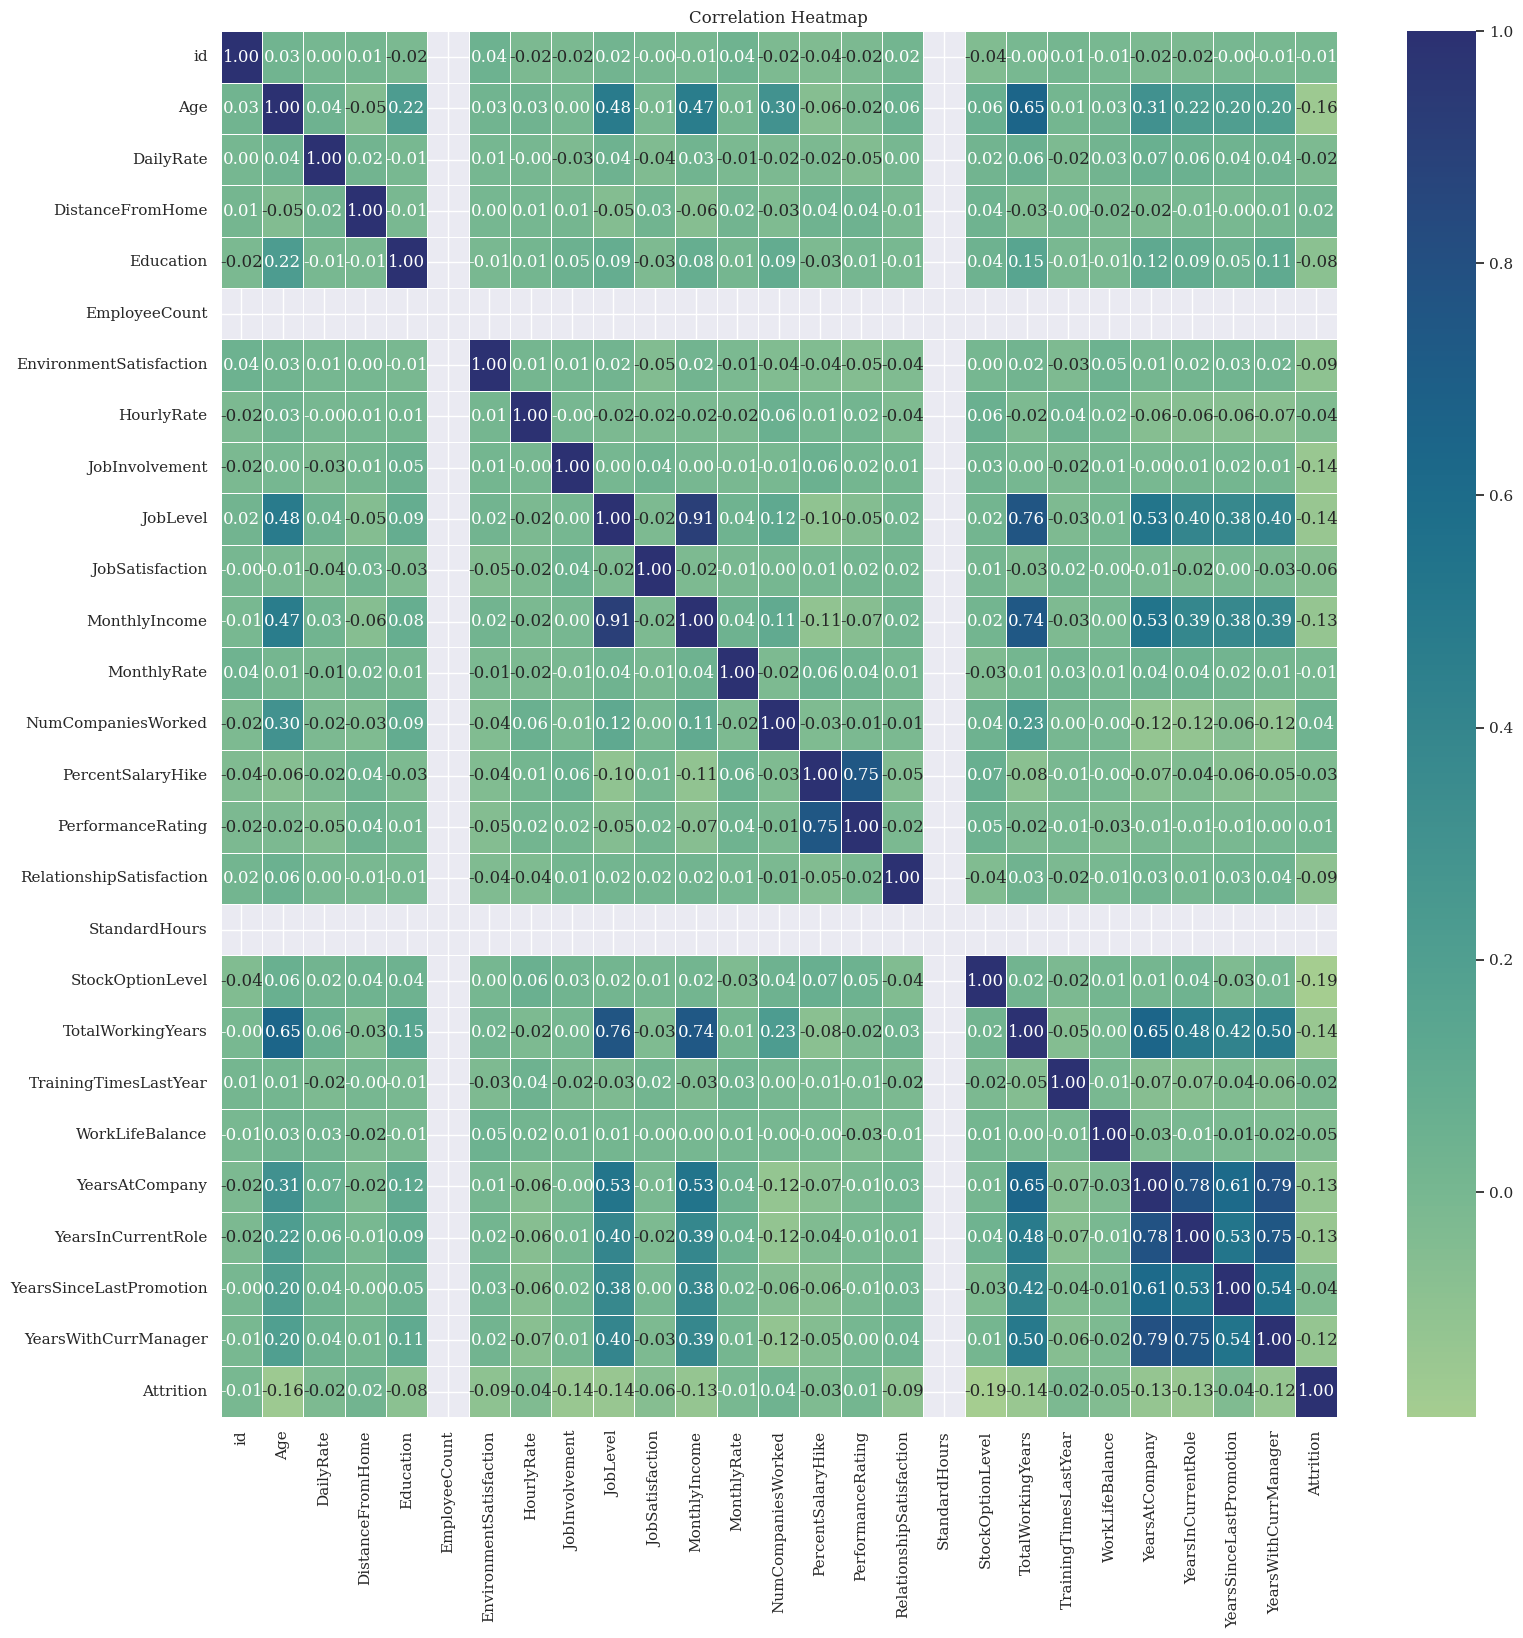

In [50]:
correlation_matrix = (data.select_dtypes(include='number')).corr()

plt.figure(figsize=(18,18))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

Not surprisingly, there are strong correlations between all the time-related columns (Age, YearsAtCompany, TotalWorkingYears, YearsSinceLastPromotion,YearsWithCurrManager). 

However, I would also have expected correlations between the different ratings for satisfaction and performance. But there are none at all!

The JobLevel variable also has some visible correlations, e.g. very strong with MonthlyIncome. But there is no correlation with the various XxxRate variables. This may be a indication that MonthlyIncome is the most important and relevant variable for income in this data set.

Furthermore, we see a strong correlation between PerformanceRating and PercentSalaryHike.

**The features have no major correlations with the Attrition target variable; the greatest correlation is with StockOptionLevel**, but this is still a small one.

It therefore seems to be a combination of different variables that makes attrition more likely.

### Age vs. Attrition

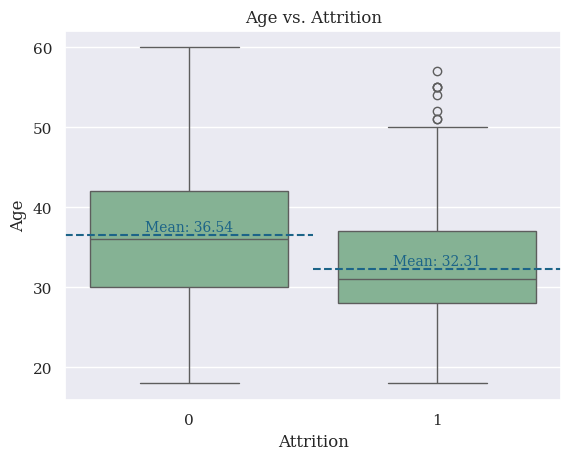

In [51]:
ax = sns.boxplot(x='Attrition', y='Age', data=data, color='#7dba91')

means = data.groupby('Attrition')['Age'].mean()

for i, mean_val in enumerate(means):
    ax.text(i, mean_val + 0.1, f'Mean: {mean_val:.2f}', ha='center', va='bottom', fontsize=10, color='#1c6488')
    
    ax.axhline(y=mean_val, linestyle='--', color='#1c6488', xmin=i/len(means), xmax=(i+1)/len(means), label=f'Mean {data["Attrition"].unique()[i]}')

plt.title('Age vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

Here we see the Attrition distribution depending on the Age variable. We can see that the Attrition=1 group is slightly younger.  In addition, Attrition=1 appears to be primarily a phenomenon of the under 50s, with the exception of a few outliers.
I find this quite surprising, as attrition can also mean retirement and this tends to affect older employees. 

### BusinessTravel vs. Attrition

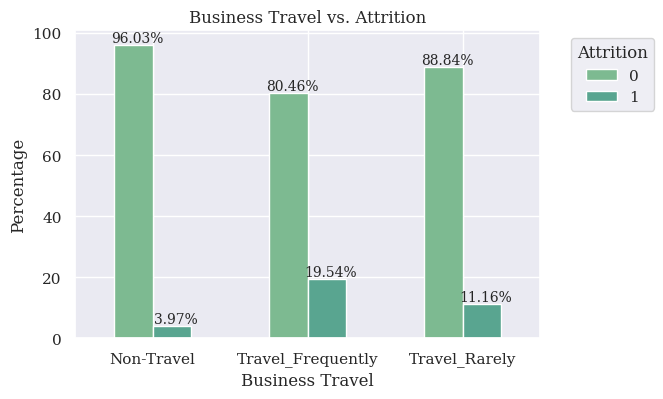

In [52]:
df_BusinessTravel = pd.crosstab(data['BusinessTravel'], data['Attrition'], normalize ='index').mul(100).round(2)
ax = df_BusinessTravel.plot.bar(figsize=(6, 4), rot=0, color=pal)

ax.legend(title='Attrition', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(3, 0), textcoords='offset points',fontsize=10)

plt.title('Business Travel vs. Attrition')
plt.xlabel('Business Travel')
plt.ylabel('Percentage')
plt.show();

We see that those who travel more are more likely to leave the job.

### DailyRate, HourlyRate, MonthlyRate vs. Attrition

In [53]:
rate_columns = ['DailyRate', 'HourlyRate', 'MonthlyRate']

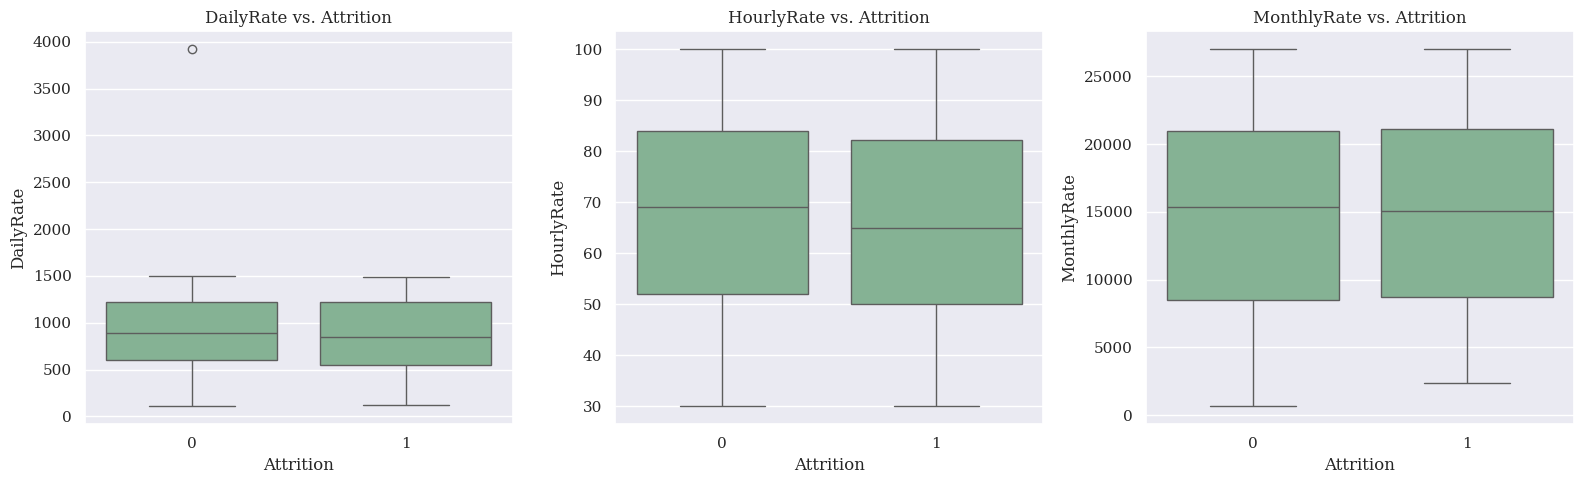

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=len(rate_columns), figsize=(16, 5))

for i, column in enumerate(rate_columns):
    sns.boxplot(x='Attrition', y=column, data=data, color='#7dba91', ax=axes[i])
    axes[i].set_title(column + ' vs. Attrition')
    axes[i].set_xlabel('Attrition')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

The distribution of the target doesn't seem to depend on any of the XxxRate columns.

### MonthlyIncome vs. Attrition

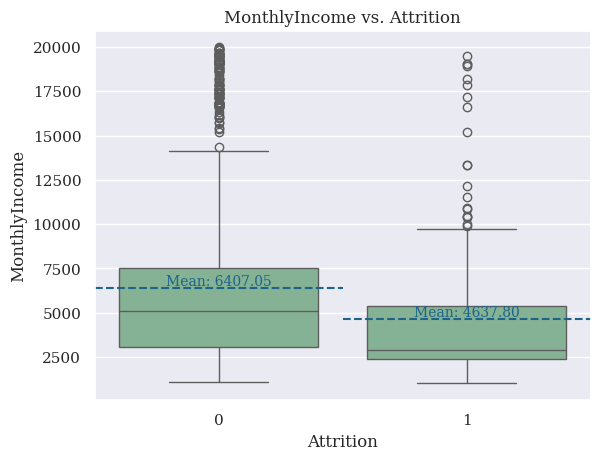

In [55]:
ax = sns.boxplot(x='Attrition', y='MonthlyIncome', data=data, color='#7dba91')

means = data.groupby('Attrition')['MonthlyIncome'].mean()

for i, mean_val in enumerate(means):
    ax.text(i, mean_val + 0.1, f'Mean: {mean_val:.2f}', ha='center', va='bottom', fontsize=10, color='#1c6488')
    
    ax.axhline(y=mean_val, linestyle='--', color='#1c6488', xmin=i/len(means), xmax=(i+1)/len(means), label=f'Mean {data["Attrition"].unique()[i]}')

plt.title('MonthlyIncome vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome')
plt.show()

Here we see the Attrition distribution depending on the MonthlyIncome. We can see that the Attrition=1 group has a lower income. This is not surprising. We saw earlier that the correlation coefficient between MonthlyIncome and Attrition was low (-0,13).

### Department vs. Attrition

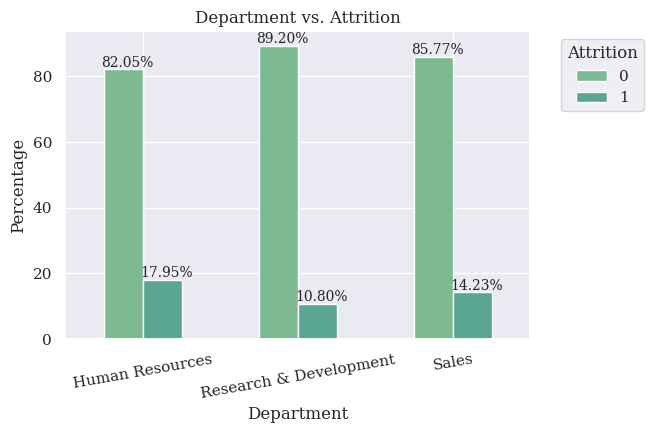

In [56]:
df_Department = pd.crosstab(data['Department'], data['Attrition'], normalize ='index').mul(100).round(2)
ax = df_Department.plot.bar(figsize=(6, 4), rot=0, color=pal)

ax.legend(title='Attrition', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(3, 0), textcoords='offset points',fontsize=10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha='center')
plt.title('Department vs. Attrition')
plt.xlabel('Department')
plt.ylabel('Percentage')
plt.show();

The likelihood of Attrition=1 is highest among Human Resources employees.

### DistanceFromHome vs. Attrition

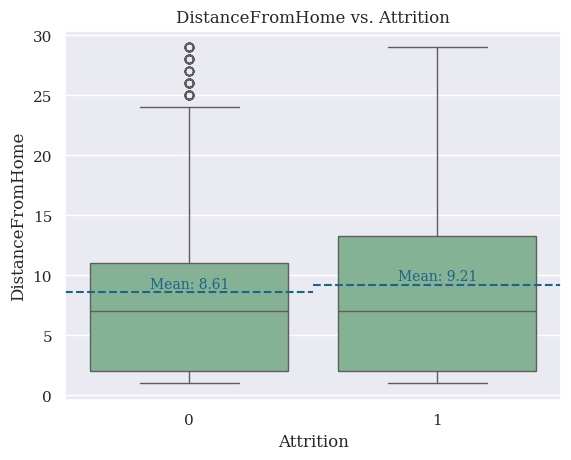

In [57]:
ax = sns.boxplot(x='Attrition', y='DistanceFromHome', data=data, color='#7dba91')

means = data.groupby('Attrition')['DistanceFromHome'].mean()

for i, mean_val in enumerate(means):
    ax.text(i, mean_val + 0.1, f'Mean: {mean_val:.2f}', ha='center', va='bottom', fontsize=10, color='#1c6488')
    
    ax.axhline(y=mean_val, linestyle='--', color='#1c6488', xmin=i/len(means), xmax=(i+1)/len(means), label=f'Mean {data["Attrition"].unique()[i]}')

plt.title('DistanceFromHome vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('DistanceFromHome')
plt.show()

Those with Attrition=1 live on average slightly further away from their workplace. Overall, however, this group shows a greater variance in values.

### Education vs. Attrition

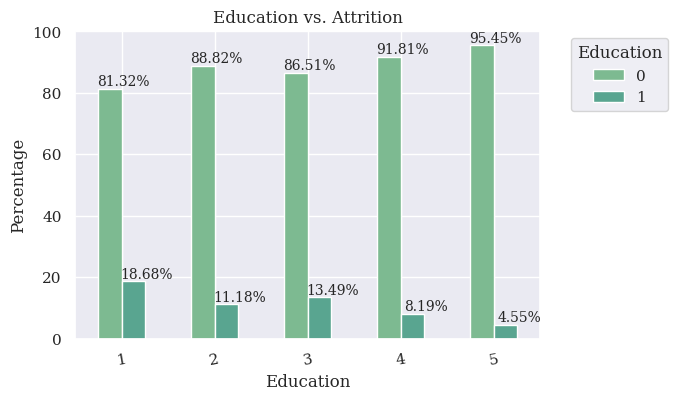

In [58]:
filtered_Education = data[data['Education'] != 15]

df_Education = pd.crosstab(filtered_Education['Education'], filtered_Education['Attrition'], normalize='index').mul(100).round(2)

ax = df_Education.plot.bar(figsize=(6, 4), rot=0, color=pal)

ax.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(10, 0), textcoords='offset points',fontsize=10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha='center')
plt.title('Education vs. Attrition')
plt.xlabel('Education')
plt.ylabel('Percentage')
plt.show();

Attrition is highest among those with Education 1 (low education) and lowest among those with Education 5 (high education). I have removed the observation with Education 15 is this plot.

### EducationField vs Attrition

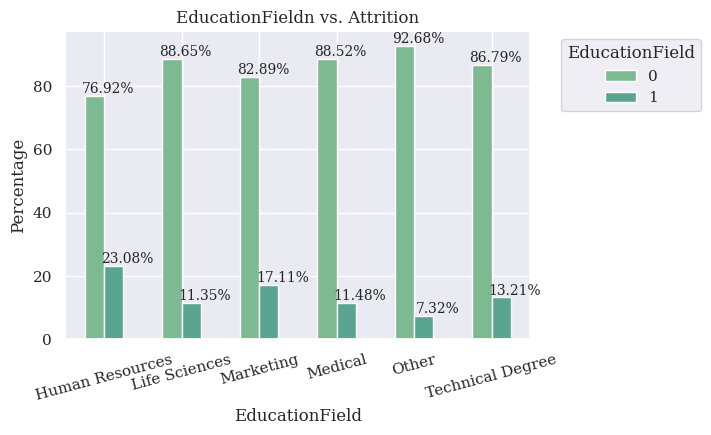

In [59]:
df_EducationField = pd.crosstab(data['EducationField'], data['Attrition'], normalize='index').mul(100).round(2)

ax = df_EducationField.plot.bar(figsize=(6, 4), rot=0, color=pal)

ax.legend(title='EducationField', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(10, 0), textcoords='offset points',fontsize=10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='center')
plt.title('EducationFieldn vs. Attrition')
plt.xlabel('EducationField')
plt.ylabel('Percentage')
plt.show();

We see that Attrition is highest among employees with education in Human Resources. This fits in with the previous finding that people in the Human Resources Department have higher Attrition.

### EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, RelationshipSatisfaction vs. Attrition

In [60]:
satisfaction_columns = ['EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction']

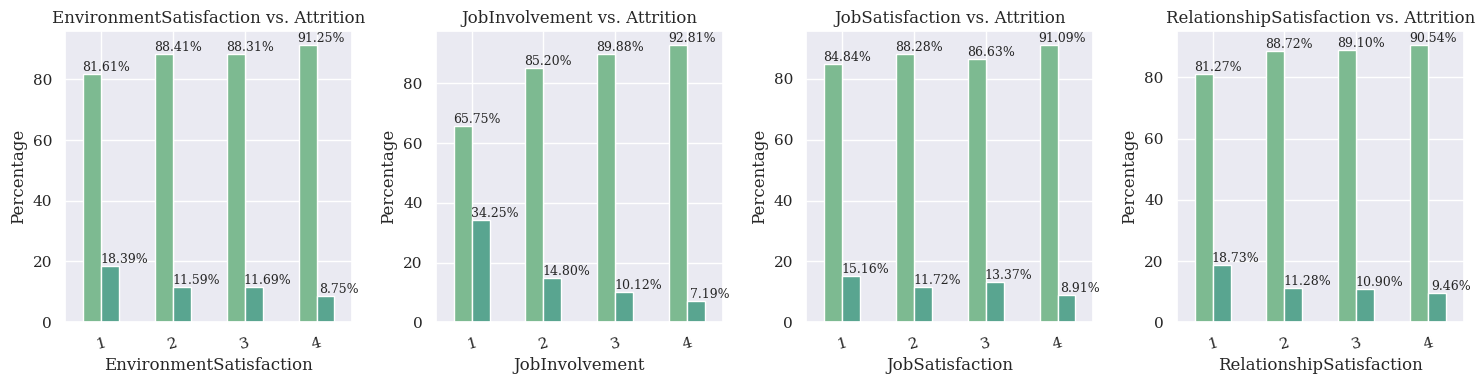

In [61]:
fig, axes = plt.subplots(1, len(satisfaction_columns), figsize=(15, 4))

for i, column in enumerate(satisfaction_columns):
    df_column = pd.crosstab(data[column], data['Attrition'], normalize='index').mul(100).round(2)

    plot = df_column.plot.bar(ax=axes[i], rot=0, color=pal, legend=False)
    
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', xytext=(10, 0), textcoords='offset points', fontsize=9)

    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=15, ha='center')
    axes[i].set_title(f'{column} vs. Attrition')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Percentage')


plt.tight_layout()
plt.show()

We see, not surprising, that higher satisfactions come with smaller Attrition. Especially the feature JobInvolvement is very interesting here. 

### Gender vs. Attrition

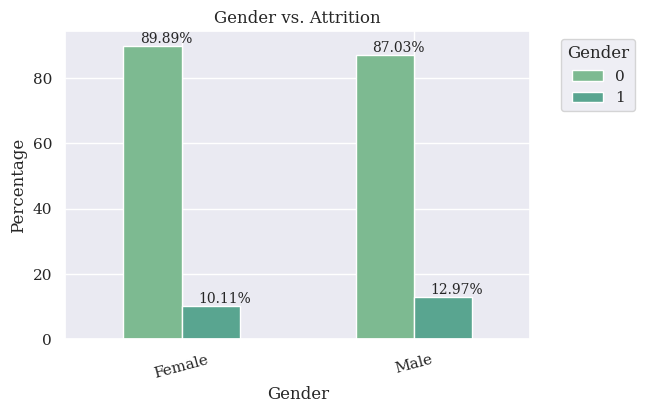

In [62]:
df_Gender = pd.crosstab(data['Gender'], data['Attrition'], normalize='index').mul(100).round(2)

ax = df_Gender.plot.bar(figsize=(6, 4), rot=0, color=pal)

ax.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(10, 0), textcoords='offset points',fontsize=10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha='center')
plt.title('Gender vs. Attrition')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show();

There are no big differences between the genders.